# Intro to Data Science with Python and VS Code

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv('data.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    object 
 13  home.dest  745 non-null    object 
dtypes: float64(2), int64(4), object(8)
memory usage: 143.3+ KB


In [3]:
data.replace('?', np.nan, inplace=True)

In [4]:
data = data.astype({"age":np.float64, "fare":np.float64})

<AxesSubplot:xlabel='survived', ylabel='fare'>

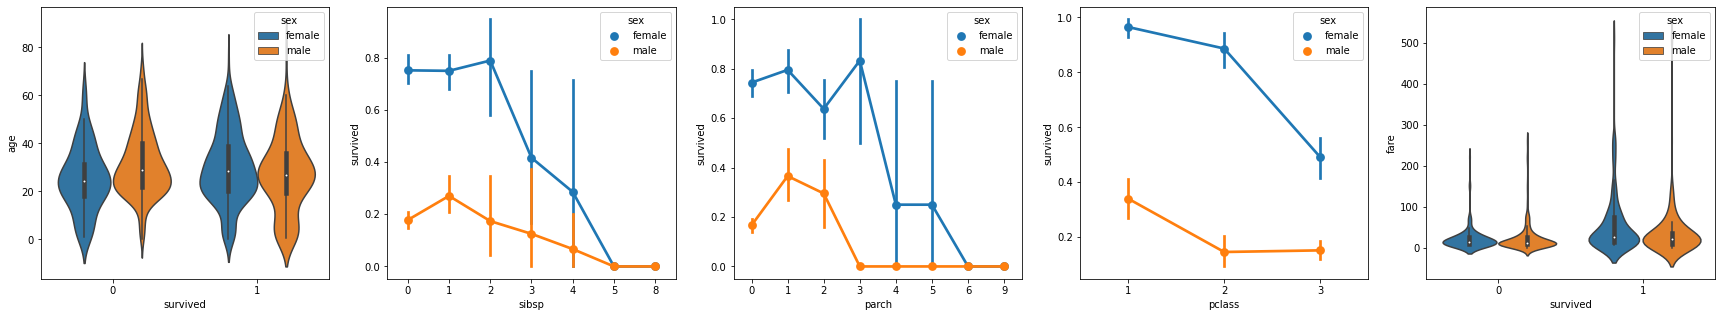

In [6]:
fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived",hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived",hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare",hue="sex", data=data, ax=axs[4])

In [7]:
data.replace({'male':1, 'female':0}, inplace=True)

In [8]:
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [9]:
data['relatives'] = data.apply(lambda row:int((row['sibsp']+row['parch'])>0),axis=1)

In [10]:
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [11]:
data = data[['sex', 'pclass', 'age', 'relatives','fare','survived']].dropna()

In [12]:
x_train, x_test, y_train, y_test, = train_test_split(data[['sex', 'pclass', 'age', 'relatives','fare']],data.survived, test_size=0.2,random_state=0)

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [14]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [15]:
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,predict_test))

0.7464114832535885
